# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Vehicle Detection


---
## Feature Extraction

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from handyfunctions import *
import glob
import pickle
%matplotlib inline
#feature params
cspace = 'YCrCb'
size = (32,32)
nbins = 48
orient = 11
pix_per_cell = 16
cell_per_block = 2
hog_channel = "ALL"
spatial_feat = True
hist_feat = True
hog_feat = True

# Flag to define whether to retrain
retrain_model = False

In [2]:
if(retrain_model):
    # Test and develop
    car_images = glob.glob('../vehicles/KITTI_extracted/*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image00*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image01*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image02*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image03*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image04*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image05*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image06*.png')
    car_images += glob.glob('../vehicles/GTI_Right/image07*.png')
    notcar_images = glob.glob('../non-vehicles/GTI/image*.png')
    notcar_images += glob.glob('../non-vehicles/Extras/extra*.png')
    test_images = glob.glob('../vehicles/GTI_Right/image08*.png')
    test_images += glob.glob('../vehicles/GTI_Right/image09*.png')
    cars = []
    notcars = []
    test = []



### Getting the dataset

In [3]:
if(retrain_model):
    for car_image in car_images:
        cars.append(car_image)
    for notcar_image in notcar_images:
        notcars.append(notcar_image)
    for test_image in test_images:
        test.append(test_image)
    car_features = extract_features(cars, color_space=cspace, spatial_size=size,
                                    hist_bins=nbins, orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, hog_channel=hog_channel,
                                    spatial_feat=spatial_feat,hist_feat=hist_feat,
                                    hog_feat=hog_feat,trans_sqrt=False,pos_case=True)
    notcar_features = extract_features(notcars, color_space=cspace, spatial_size=size,
                                    hist_bins=nbins, orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, hog_channel=hog_channel,
                                    spatial_feat=spatial_feat,hist_feat=hist_feat,
                                    hog_feat=hog_feat,trans_sqrt=False,pos_case=False)
    test_features =  extract_features(test, color_space=cspace, spatial_size=size,
                                    hist_bins=nbins, orient=orient, pix_per_cell=pix_per_cell, 
                                    cell_per_block=cell_per_block, hog_channel=hog_channel,
                                    spatial_feat=spatial_feat,hist_feat=hist_feat,
                                    hog_feat=hog_feat,trans_sqrt=False,pos_case=True)
    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    print(scaled_X.shape)
    scaler_out = open("x_scaler.p","wb")
    pickle.dump(X_scaler,scaler_out)
    scaler_out.close()

### Visualizing the data

In [4]:
if(retrain_model):
    car_ind = np.random.randint(0, len(cars))
    notcar_ind = np.random.randint(0, len(notcars))+len(cars)
    fig = plt.figure(num=1,figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Car Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    fig.savefig('./output_images/car.png')
    fig = plt.figure(num=2,figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(notcars[notcar_ind-len(cars)]))
    plt.title('Not Car Image')
    plt.subplot(132)
    plt.plot(X[notcar_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[notcar_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    fig.savefig('./output_images/not_car.png')

In [5]:
if(retrain_model):
    car_img = mpimg.imread(cars[car_ind])
    not_car_img = mpimg.imread(notcars[notcar_ind-len(cars)])
    car_feat_img = convert_color(car_img,'RGB2YCrCb')
    ncar_feat_img = convert_color(not_car_img,'RGB2YCrCb')
    car_feat0, car_hog0 = get_hog_features(car_feat_img[:,:,0],orient,8,cell_per_block,True)
    ncar_feat0, ncar_hog0 = get_hog_features(ncar_feat_img[:,:,0],orient,8,cell_per_block,True)
    car_feat1, car_hog1 = get_hog_features(car_feat_img[:,:,1],orient,8,cell_per_block,True)
    ncar_feat1, ncar_hog1 = get_hog_features(ncar_feat_img[:,:,1],orient,8,cell_per_block,True)
    car_feat2, car_hog2 = get_hog_features(car_feat_img[:,:,2],orient,8,cell_per_block,True)
    ncar_feat2, ncar_hog2 = get_hog_features(ncar_feat_img[:,:,2],orient,8,cell_per_block,True)
    fig1 = plt.figure(num=1,figsize=(12,4))
    plt.subplot(141)
    plt.title('Car CH0')
    plt.imshow(car_feat_img[:,:,0],cmap='gray')
    plt.subplot(142)
    plt.title('Car HOG CH0')
    plt.imshow(car_hog0,cmap='gray')
    plt.subplot(143)
    plt.title('Not Car CH0')
    plt.imshow(ncar_feat_img[:,:,0],cmap='gray')
    plt.subplot(144)
    plt.title('Not Car HOG CH0')
    plt.imshow(ncar_hog0,cmap='gray')
    fig2 = plt.figure(num=2,figsize=(12,4))
    plt.subplot(141)
    plt.title('Car CH1')
    plt.imshow(car_feat_img[:,:,1],cmap='gray')
    plt.subplot(142)
    plt.title('Car HOG CH1')
    plt.imshow(car_hog1,cmap='gray')
    plt.subplot(143)
    plt.title('Not Car CH1')
    plt.imshow(ncar_feat_img[:,:,1],cmap='gray')
    plt.subplot(144)
    plt.title('Not Car HOG CH1')
    plt.imshow(ncar_hog1,cmap='gray')
    fig3 = plt.figure(num=3,figsize=(12,4))
    plt.subplot(141)
    plt.title('Car CH2')
    plt.imshow(car_feat_img[:,:,2],cmap='gray')
    plt.subplot(142)
    plt.title('Car HOG CH2')
    plt.imshow(car_hog2,cmap='gray')
    plt.subplot(143)
    plt.title('Not Car CH2')
    plt.imshow(ncar_feat_img[:,:,1],cmap='gray')
    plt.subplot(144)
    plt.title('Not Car HOG CH2')
    plt.imshow(ncar_hog2,cmap='gray')
    fig1.savefig('./output_images/hog_example1.png')
    fig2.savefig('./output_images/hog_example2.png')
    fig3.savefig('./output_images/hog_example3.png')

In [6]:
if(retrain_model):
    rando = mpimg.imread(cars[car_ind])
    rando_hist = color_hist(rando)
    rando_mean = np.mean(rando)
    print('rando_mean: ',rando_mean)
    print('rando_amax: ',np.amax(rando))

## Build and Train Classifier

In [7]:
if(retrain_model):
    # need to retain scaler for use in pipline
    # split data into training and test
    y = np.hstack((np.ones(len(car_features)), 
                  np.zeros(len(notcar_features))))
    rand_state = np.random.randint(0,100)
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                        y, 
                                                        test_size=0.2,
                                                        random_state=rand_state)


In [8]:
if(retrain_model):
    #parameters = {'C':[0.0001,0.001,0.01]} # prev grid search yielded linear as best, C= 0.001 best
    clf=SVC(kernel='linear',C=0.001)
    #clf = GridSearchCV(svc,parameters)
    svr = clf.fit(X_train, y_train)
    print('Test Accuracy of SVC = ',clf.score(X_test, y_test))#," best params: ",clf.best_params_)

In [9]:
if(retrain_model):
    pickle_out = open("clfParams.p","wb")
    pickle.dump(svr,pickle_out)
    pickle_out.close()

### Restore saved parameters

In [10]:
params_file = open("clfParams.p","rb")
svr = pickle.load(params_file)
params_file.close()
scaler_file = open("x_scaler.p","rb")
X_scaler = pickle.load(scaler_file)
scaler_file.close()

## Sliding Window Implementation

### Compute the windows once; apply to all images

In [11]:
image = mpimg.imread('./test_images/test1.jpg') #default grab to get image size
x_start_stop=[350, 1280]
window_ranges = ((350,530,64),(379,530,96),(400,530,128),(450,610,160),(458,650,192))
windows = []
for win_range in window_ranges:
    windows.extend(slide_window(image, x_start_stop=x_start_stop, y_start_stop=(win_range[0],win_range[1]), 
                    xy_window=(win_range[2], win_range[2]), xy_overlap=(0.70, 0.70)))
if(retrain_model):
    all_windows = draw_boxes(image,windows)
    plt.imshow(all_windows)
    plt.imsave('./output_images/all_windows.png',all_windows)

In [12]:
mvg_avg = 10
heatmaps = []
def pipeline(image,debug=False):
    copy_image = np.copy(image)
    if(np.amax(image)>1):
        image = image.astype(np.float32)/255
    new_hot_windows = search_windows(image, windows, svr, X_scaler, conv='RGB2YCrCb', 
                        spatial_size=size, hist_bins=nbins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    #if(len(new_hot_windows)>0):
    #    hot_windows_list.append(new_hot_windows)
    avg = mvg_avg
    #total = len(hot_windows_list)
    #if(total >0):
    #    if(total<avg):
    #        avg = total
    hot_windows = new_hot_windows
    #    if total> 1:
    #        for i in range(2,avg):
    #            hot_windows = np.concatenate((hot_windows,hot_windows_list[total-i]),axis=0)      
    curr_heat = add_heat(heat,hot_windows)
    heatmaps.append(curr_heat)
    total = len(heatmaps)
    heat = curr_heat
    if(total>1):
        if(total<avg):
            avg = total
        for i in range(2,avg):
            heat = np.add(heat, heatmaps[total-i])
    
    heatmap = np.clip(heat, 0, 255)
    heatmap = apply_threshold(heatmap,2)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(copy_image, labels)
    #else:
    #    return copy_image
    if(debug):
        return draw_img,heat,heatmap
    return draw_img

In [13]:
def debugPipeline(image):
    draw_img, heat, heatmap = pipeline(image,True)
    h = np.dstack((heat,heat,heat))*255
    hm = np.dstack((heatmap,heatmap,heatmap))*255
    right = np.concatenate((h,hm),axis=0)
    #print("input shapes: {0},{1},{2}".format(draw_img.shape,heat.shape,heatmap.shape))
    #print(right.shape)
    right_resized = cv2.resize(right,(int(right.shape[1]/2),int(right.shape[0]/2)))
    result = np.concatenate((draw_img,right_resized),axis=1)
    result = cv2.resize(result,(int(result.shape[1]/1.5),int(result.shape[0]/1.5)))
    return result

In [21]:
counter = 0
def debug2Pipeline(image):
    global counter
    draw_img, heat, heatmap = pipeline(image,True)
    counter += 1
    if(counter%6 == 0):
        plt.imsave('./output_images/bbox{0}.png'.format(counter/10),draw_img)
        plt.imsave('./output_images/heat{0}.png'.format(counter/10),heat,cmap='hot')
    return draw_img#,heat,heatmap

C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


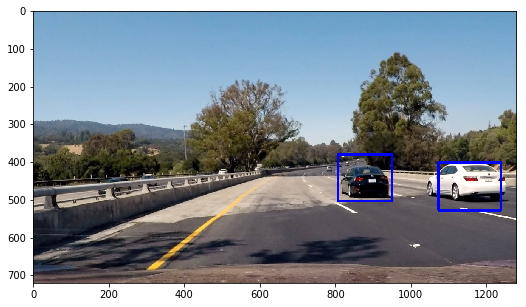

In [15]:
heatmaps=[]
image = mpimg.imread('./test_images/test4.jpg')
fig = plt.figure(num=1,figsize=(12,5))
draw_image = pipeline(image)
plt.imshow(draw_image)

In [16]:
if(retrain_model):
    test_images = glob.glob('./test_images/test*.jpg')
    i=1
    for image in test_images:
        heatmaps=[]
        img = mpimg.imread(image)
        fig = plt.figure(num=i, figsize=(12,4))
        draw_img,heat,heatmap = debug2Pipeline(img)
        plt.subplot(121)
        plt.title('Cars found in test{0}.jpg'.format(i))
        plt.imshow(draw_img)
        plt.subplot(122)
        plt.title('Heat map for test{0}.jpg'.format(i))
        plt.imshow(heat*255,cmap='hot')
        fig.savefig('./output_images/pipelineTest{0}.png'.format(i))
        i+=1


### Adding heat map

C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


0


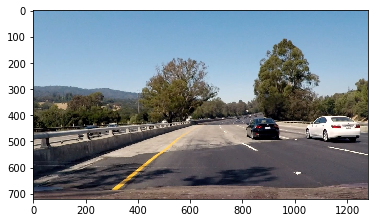

In [17]:
y_start_stop = [450, 650] # Min and max in y to search in slide_window()
x_start_stop=[400, 1280]
ystart =  y_start_stop[0]
ystop = y_start_stop[1]
scale=1
out_img, bbox_list = find_cars(image, 
                               y_start_stop, 
                               x_start_stop, 
                               scale, 
                               svr, 
                               X_scaler, 
                               orient, 
                               pix_per_cell, 
                               cell_per_block, 
                               size, 
                               nbins, 
                               True,
                               'RGB2YCrCb')
draw_image = np.copy(image)
print(len(bbox_list))
window_img = draw_boxes(draw_image, bbox_list, color=(0, 0, 1), thick=6)
plt.imshow(window_img)

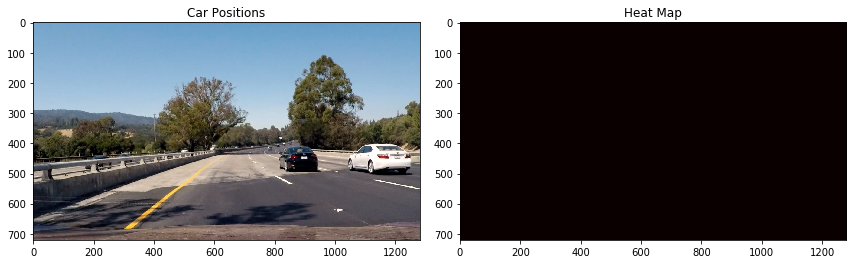

In [18]:
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat,bbox_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

## Apply to Video

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [24]:
project_video = 'project_video.mp4'
project_output = 'output_video.mp4'
heatmaps=[]
clip1 = VideoFileClip(project_video)
project_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output, audio=False)

OSError: [WinError 6] The handle is invalid

In [22]:
counter = 0
test_video = 'test_video.mp4'
test_output ='test_output.mp4'
heatmaps=[]
clip2 = VideoFileClip(test_video)
project_clip = clip2.fl_image(debug2Pipeline)
%time project_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


 97%|████████████████████████████████████████▉ | 38/39 [02:13<00:03,  3.45s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 

Wall time: 2min 14s


In [28]:
#c_img, h, hm = debug2Pipeline(image)
#plt.imsave('./output_images/new_h.png',h,cmap='hot')
